### Import EDA Packages

In [59]:
import numpy as np
import pandas as pd

#### Upload the CSV file in a dataframe for Analysis
* df.head(3): Top 3 items in the dataset.
* df.tail(3): Last 3 Items in the dataset.
* df.describe(): provide the measure of central tendencies accross dataset.

In [44]:
df = pd.read_csv('Insurance EDA Dataset.csv')


In [46]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [47]:
df.tail(3)

,age,sex,bmi,children,smoker,region,charges
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [48]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
description = df.describe().round(1)
print(description)

          age     bmi  children  charges
count  1338.0  1338.0    1338.0   1338.0
mean     39.2    30.7       1.1  13270.4
std      14.0     6.1       1.2  12110.0
min      18.0    16.0       0.0   1121.9
25%      27.0    26.3       0.0   4740.3
50%      39.0    30.4       1.0   9382.0
75%      51.0    34.7       2.0  16639.9
max      64.0    53.1       5.0  63770.4


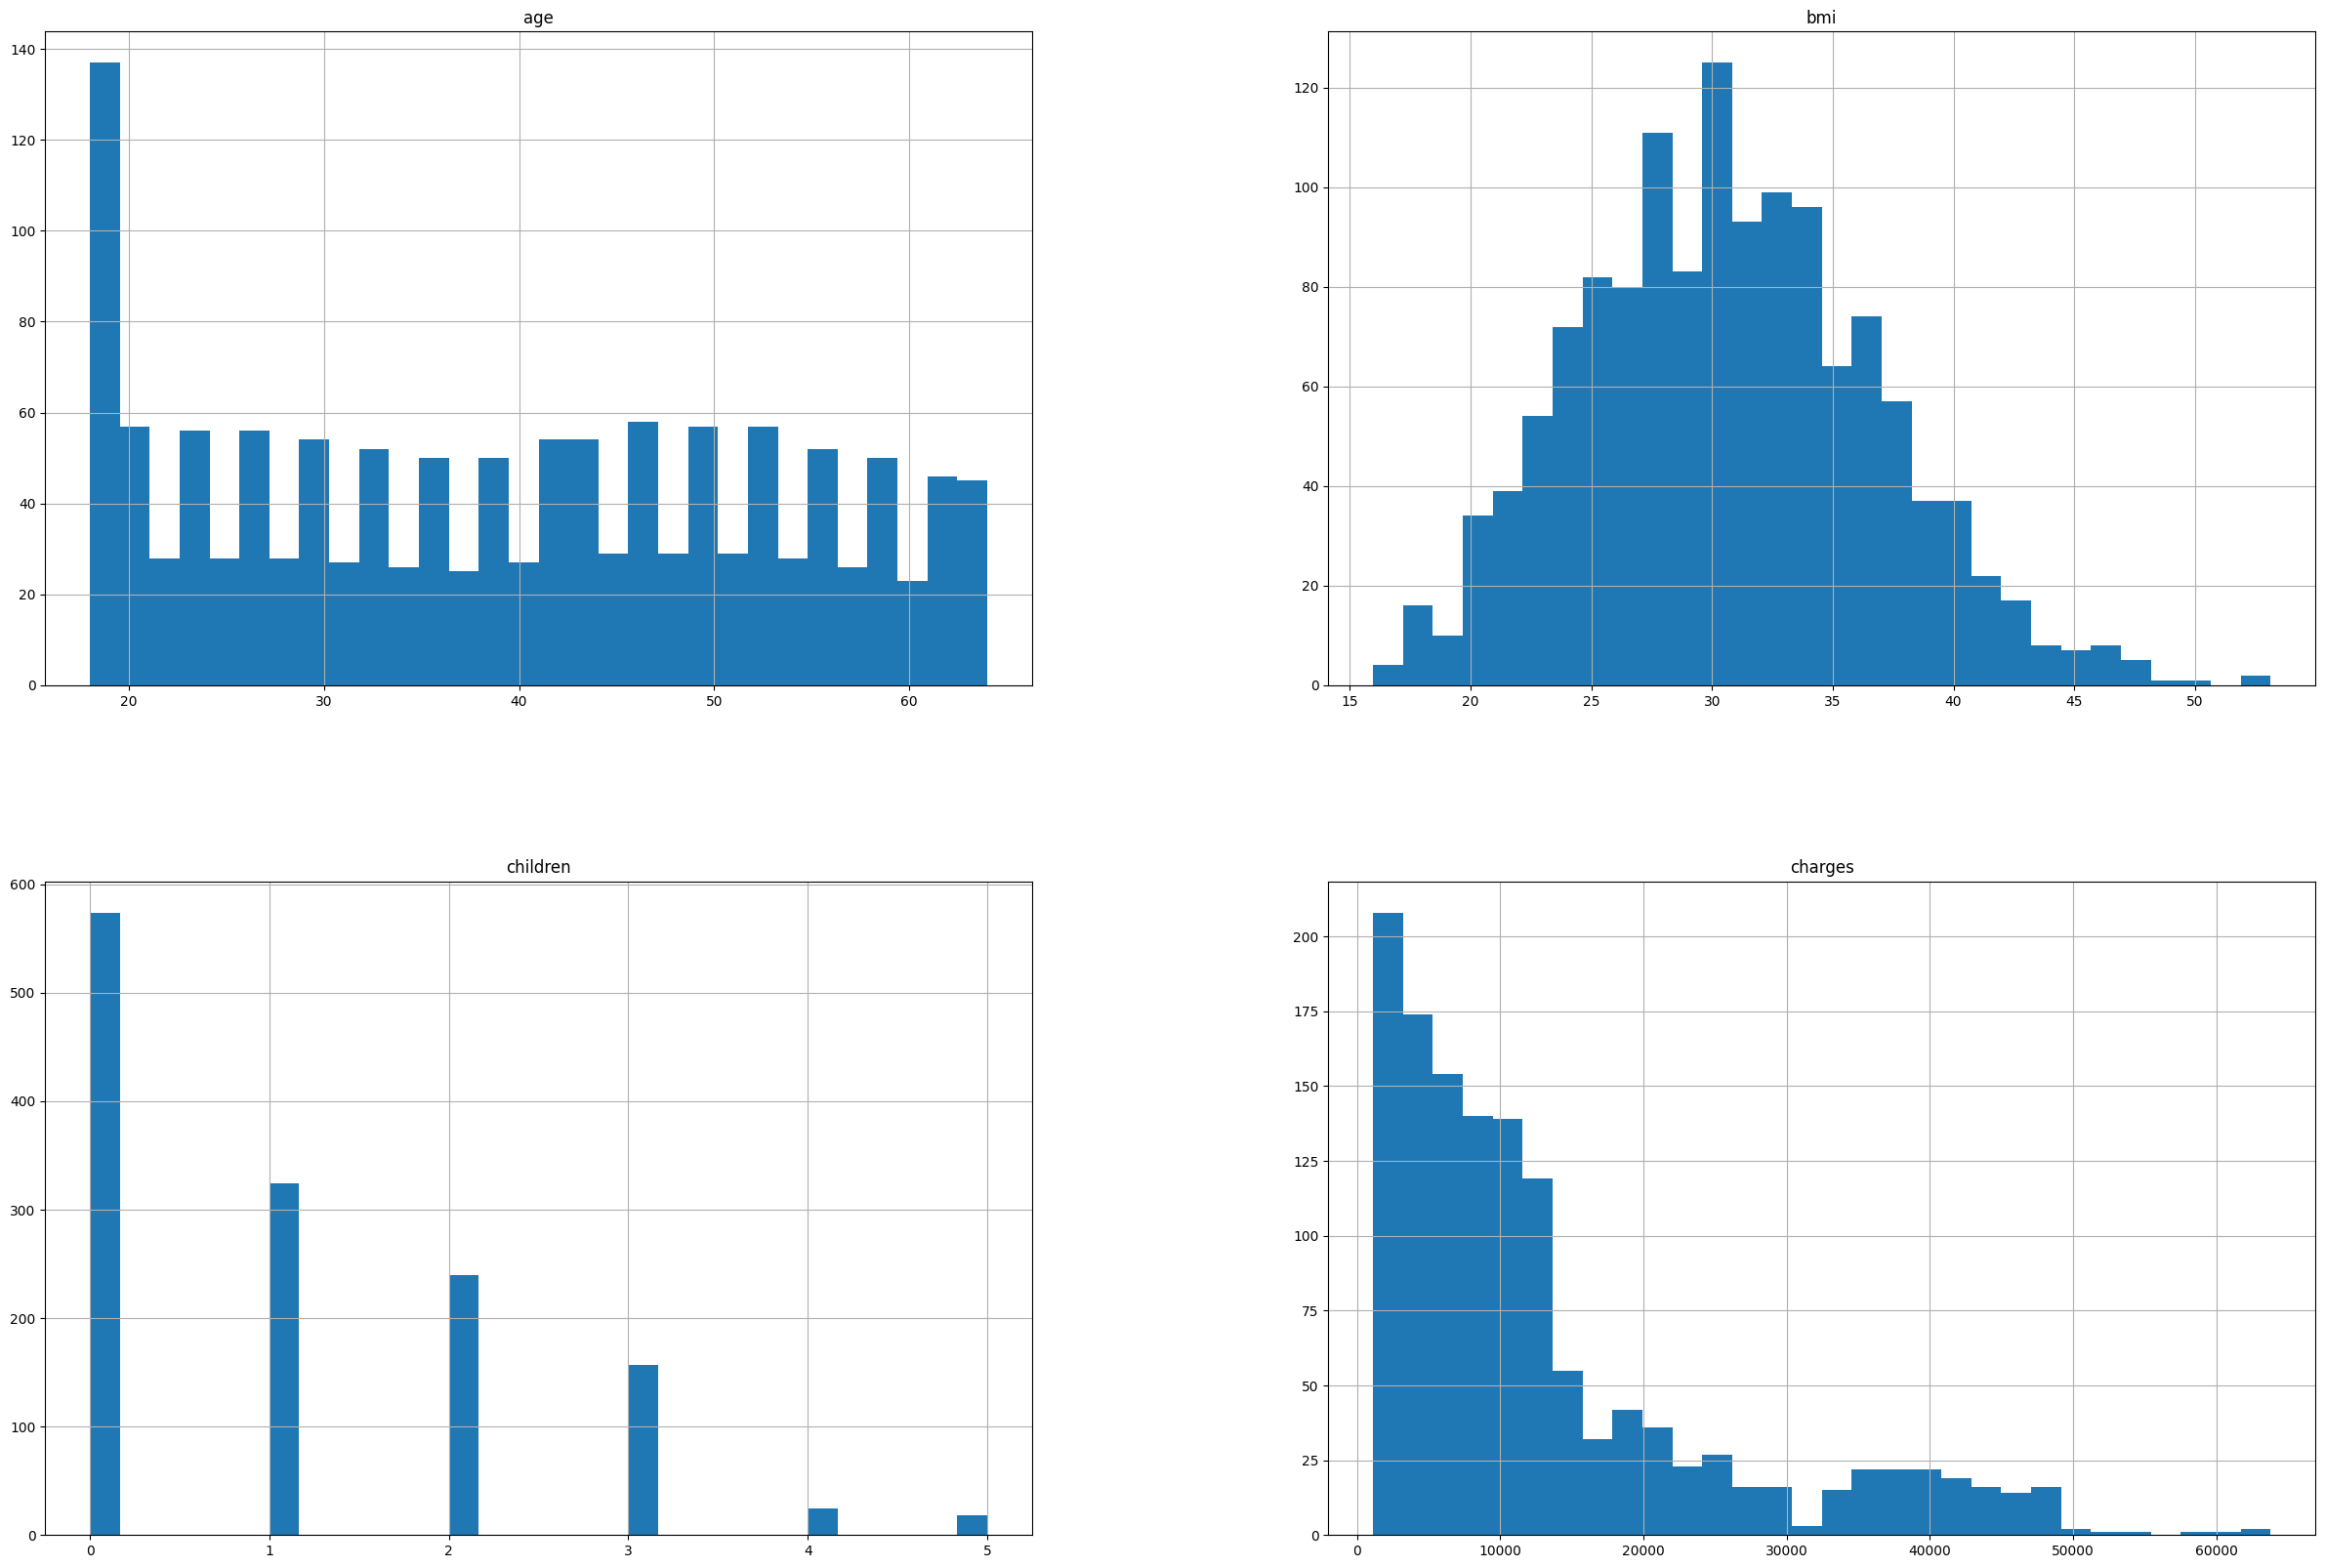

In [50]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(30, 20))
plt.show()

In [51]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

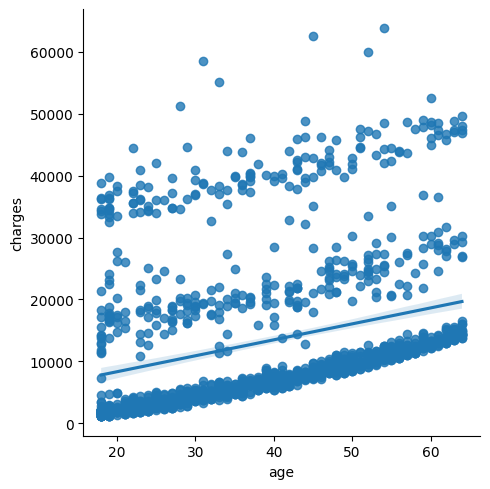

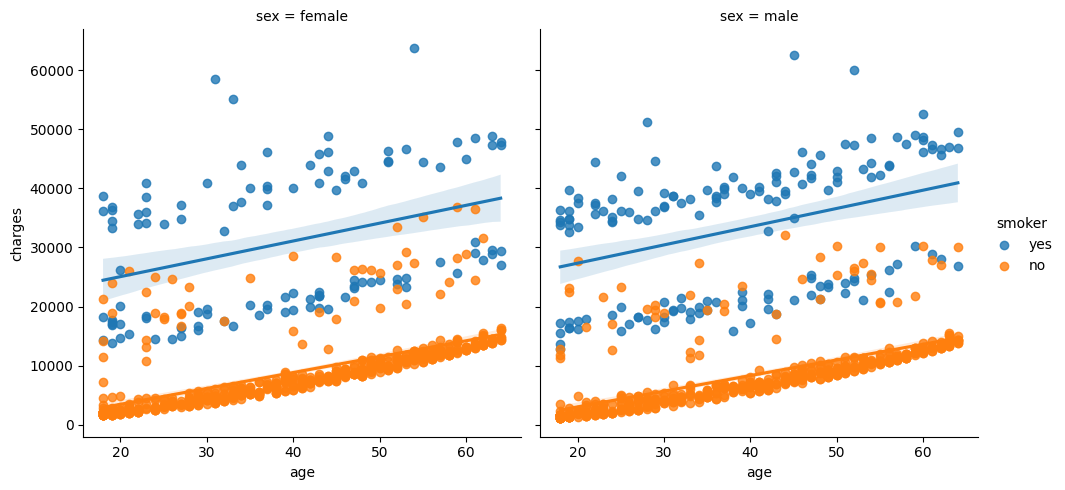

In [53]:
data1=df
sns.lmplot(x='age', y ='charges', data=data1)

sns.lmplot(x='age', y ='charges',hue='smoker', col ='sex', data=data1)

df1, df2 = data1.loc[data1['age'] < 40 ] , data1.loc[data1['age'] >= 40 ]
 

Text(0.5, 1.0, 'age < 40')

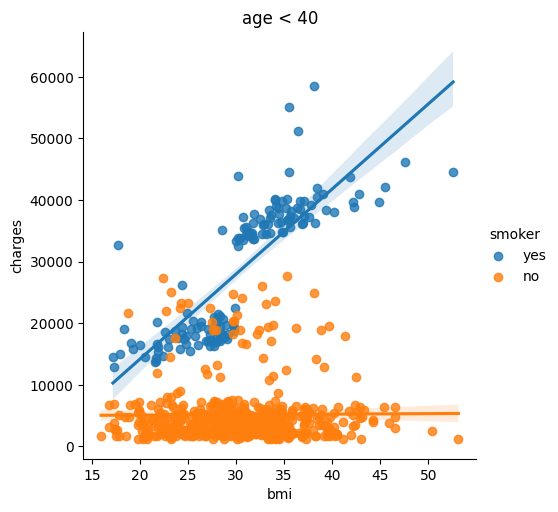

In [54]:
lm = sns.lmplot(x='bmi', y ='charges',hue='smoker',data=df1)
ax1 =lm.axes
ax1=plt.gca()
ax1.set_title('age < 40')

Text(0.5, 1.0, 'age >= 40')

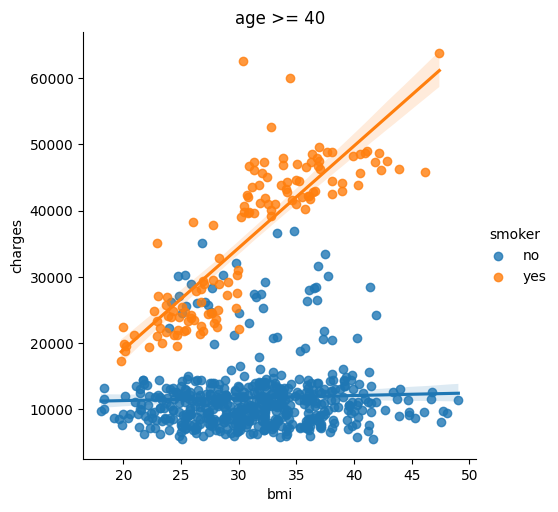

In [55]:
lm_2 = sns.lmplot(x='bmi', y ='charges',hue='smoker',data=df2)
 
ax2 =lm_2.axes
ax2=plt.gca()
ax2.set_title('age >= 40')

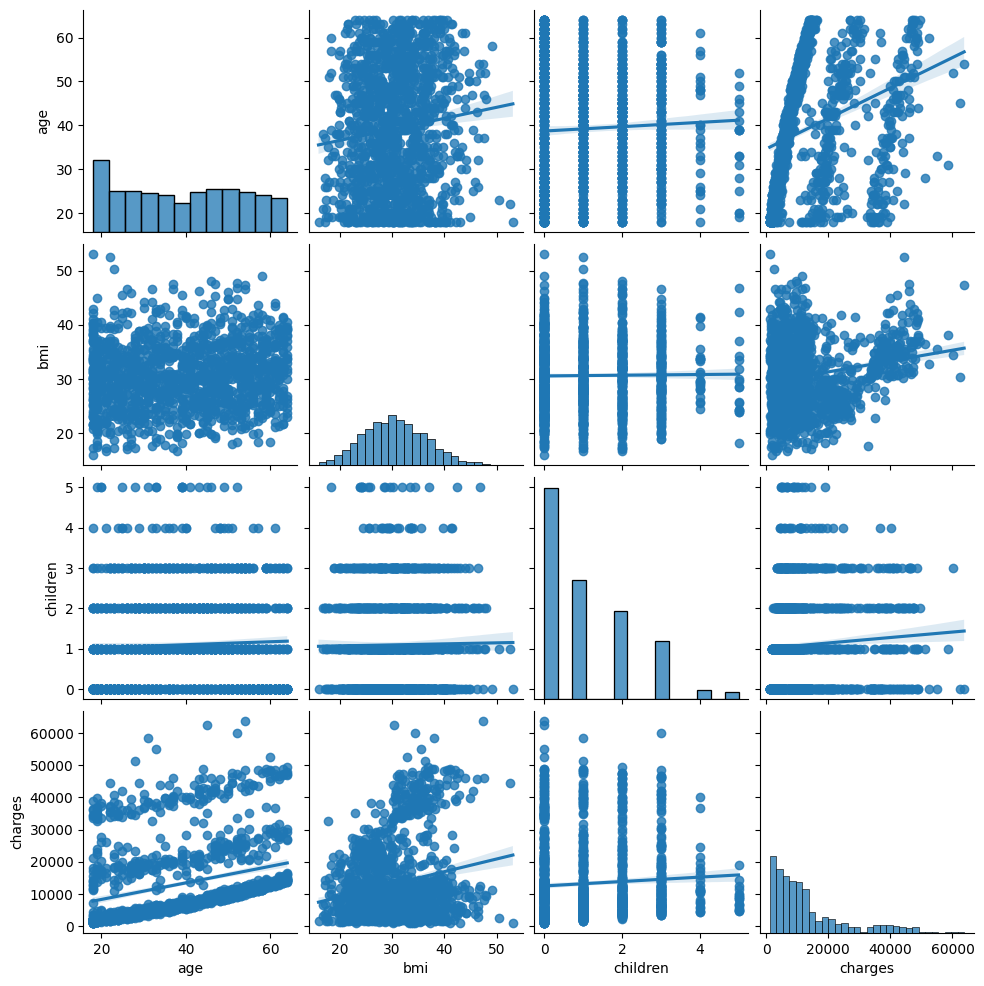

In [56]:
sns.pairplot(data1, kind="reg")
plt.show()

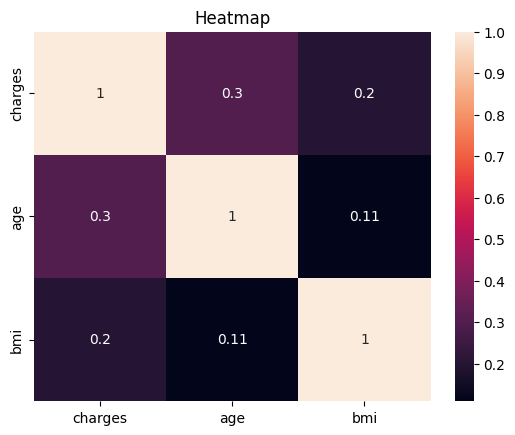

In [62]:
corr = data1[['charges', 'age', 'bmi']].corr()

sns.heatmap(corr, annot=True)

plt.title('Heatmap')

plt.show()

# Regression In Python.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [12]:
# Advertising and Sales Data
X = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0])
y = np.array([0.3, 0.6, 1.5, 3.0, 5.0, 7.8, 11.0, 15.0, 20.0, 30.0])

In [14]:
# Reshape X to be a column vector
X = X[:, np.newaxis]

In [33]:
# Linear regression
lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin_pred = lin_model.predict(X)

In [32]:
# Polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

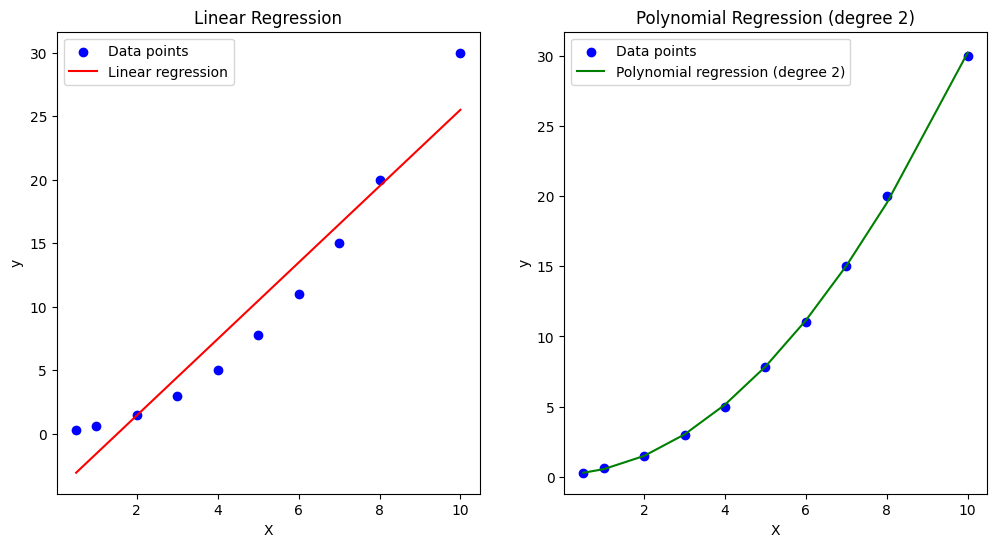

In [35]:
# Plot the results in separate subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Linear regression plot
ax[0].scatter(X, y, color='blue', label='Data points')
ax[0].plot(X, y_lin_pred, color='red', label='Linear regression')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].set_title('Linear Regression')

# Sort X and y_poly_pred for plotting
sorted_order = np.argsort(X.squeeze())
X_sorted = X[sorted_order]
y_poly_pred_sorted = y_poly_pred[sorted_order]

# Polynomial regression plot
ax[1].scatter(X, y, color='blue', label='Data points')
ax[1].plot(X_sorted, y_poly_pred_sorted, color='green', label='Polynomial regression (degree 2)')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].legend()
ax[1].set_title('Polynomial Regression (degree 2)')

plt.show()

In [36]:
# Calculate r squared values
r2_lin = r2_score(y, y_lin_pred)
r2_poly = r2_score(y, y_poly_pred)
print(f"Linear Regression: r^2 = {r2_lin:.3f}")
print(f"Polynomial Regression: r^2 = {r2_poly:.3f}")

Linear Regression: r^2 = 0.930
Polynomial Regression: r^2 = 1.000


## Idendifying Critical Factor

In [38]:
import pandas as pd
import statsmodels.api as sm

In [39]:
# Creating the dataset
data = {
    'Digital_Ad_Spend': [50, 60, 70, 80, 85, 90, 92, 95, 96, 98],
    'Traditional_Ad_Spend': [50, 40, 30, 20, 15, 10, 8, 5, 4, 2],
    'Discounts': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Sales': [400, 410, 420, 430, 440, 450, 460, 470, 475, 480]
}
df = pd.DataFrame(data)

In [ ]:
# Defining the independent variables (X) and the dependent variable (y)
X = df[['Digital_Ad_Spend', 'Traditional_Ad_Spend', 'Discounts']]
y = df['Sales']

In [40]:
# Adding a constant to the model (intercept)
X = sm.add_constant(X)

In [41]:
# Creating the model
model = sm.OLS(y, X).fit()

In [42]:
# Getting the coefficients
coefficients = model.params
print(coefficients)

[-4.56407271  3.00732746]


## Time Series Forecasting

Forcasting future sales based on historical sales and the data is available in cronological order. Steps involved are:
1. Decompose
2. Forecast
3. Recompose

Using Phrophet model from Facebook

In [63]:
data= pd.read_csv('Prophet.csv')
data.head()

,ds,y
0,01-01-2013,9.590761
1,02-01-2013,8.519590
2,03-01-2013,8.183677
3,04-01-2013,8.072467
4,05-01-2013,7.893572


In [69]:
#install with "python -m pip install prophet"
from fbprophet import Prophet
m = Prophet()
m.fit(data)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
future = m.make_future_dataframe(365)
future.tail(5)

In [ ]:
forecast = m.predict(future)
forecast.head(5)

In [ ]:
plot1 = m.plot(forecast)
plot1

In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [75]:
# Load the dataset
data = pd.read_csv('Insurance multiple regression.csv')

In [77]:
# Check for null values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [78]:
# Replace null values with median/mode as appropriate
median = data['charges'].median()
data['charges'] = data['charges'].fillna(median)
mode = data['region'].mode()[0]
data['region'] = data['region'].fillna(mode)


In [79]:
# Encode non-numeric features
labelencoder = LabelEncoder()
data['sex'] = labelencoder.fit_transform(data['sex'])
data['smoker'] = labelencoder.fit_transform(data['smoker'])
data['region'] = labelencoder.fit_transform(data['region'])

In [80]:
# Check for multicollinearity
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

   VIF Factor  features
0    7.551348       age
1    2.001061       sex
2   10.371829       bmi
3    1.801245  children
4    1.256837    smoker
5    2.924528    region


Dropping features with low correlation with y: ['sex', 'children', 'region']
Features selected: Index(['age', 'bmi', 'smoker'], dtype='object')


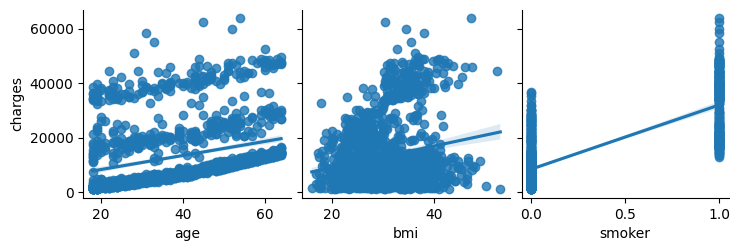

In [81]:
# Drop features with low correlation with y
corr = data.corr()['charges'].abs()
features_to_drop = corr[corr < 0.1].index.tolist()
if len(features_to_drop) > 0:
    print("Dropping features with low correlation with y:", features_to_drop)
    X = X.drop(features_to_drop, axis=1)

print("Features selected:", X.columns)

sns.pairplot(data, x_vars=X.columns, y_vars='charges', kind='reg')
plt.show()

In [82]:
# Identify and remove outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X = X[~outliers]
y = y[~outliers]

/tmp/ipykernel_9253/2373661296.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(X, kind='kde')


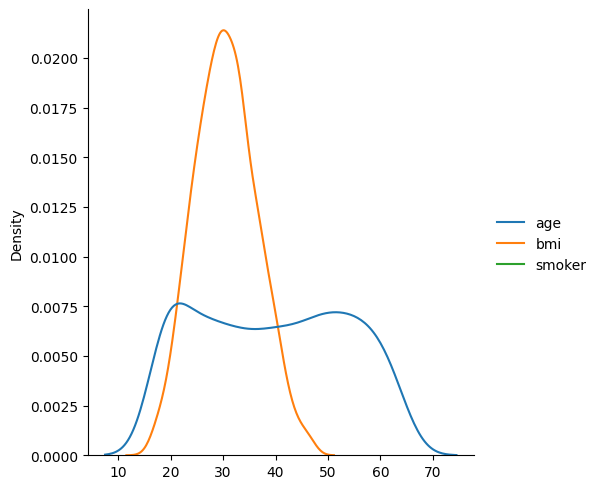

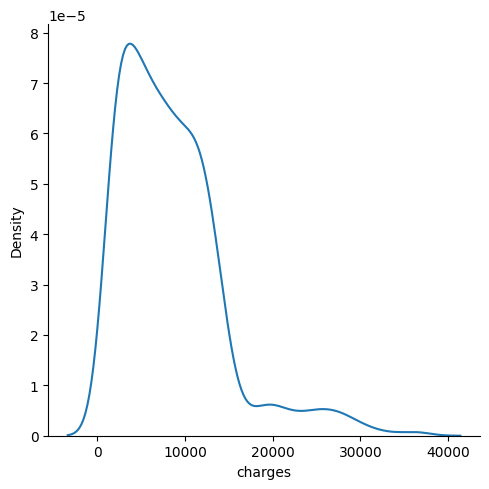

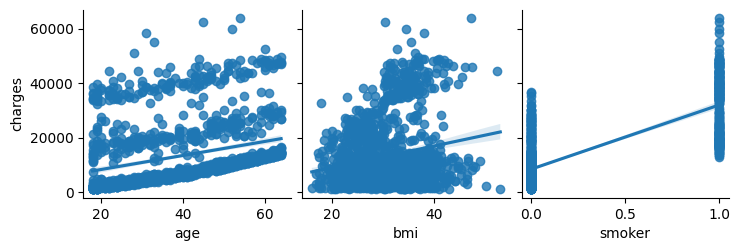

In [83]:
# Plot distribution of X and y
sns.displot(X, kind='kde')
plt.show()

sns.displot(y, kind='kde')
plt.show()

sns.pairplot(data, x_vars=X.columns, y_vars='charges', kind='reg')
plt.show()

## Streamlit

This is a platform that help the Machine Learning Engineer to create a web user interface for their models.

### Infrastructures
* Anaconda
* Notepad for python code

## Installation 
* Pip install streamlit

### Create a .py file 
* Streamlit.py
* Run with -- streamlit run "Filename.py" e.g  streamlit run Streamlit.py
* ctrl c to stop running